# TALLER 2 - CIENCIA DE DATOS APLICADA

El presente corresponde al taller 2 de la materia ciencia de datos aplicada de la maestria de en Ingenieria de la Información

Ruben Dario Bohorquez Cortazar
Cod: 201413682
CC:  1072712473

In [623]:
#Importe de las librerias y configuración de dataframes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


from ydata_profiling import ProfileReport

import scipy.stats as stats

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

In [624]:
data = pd.read_csv("./data/gapminder_final.csv")

In [625]:
data.shape

(178, 16)

In [626]:
data.dtypes

country                  object
incomeperperson         float64
alcconsumption          float64
armedforcesrate         float64
breastcancerper100th    float64
co2emissions            float64
femaleemployrate        float64
hivrate                 float64
internetuserate         float64
lifeexpectancy          float64
oilperperson            float64
polityscore             float64
relectricperperson      float64
suicideper100th         float64
employrate              float64
urbanrate               float64
dtype: object

In [627]:
data.sample(7)

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
87,Romania,2636.787800,16.15,1.536766,44.3,7.104137e+09,43.799999,0.10,40.020095,73.979,0.423524,9.0,467.565808,10.059320,49.500000,54.24
34,Gabon,4180.765821,9.46,1.018906,18.2,1.708043e+08,52.599998,5.20,7.232224,62.703,NaN,3.0,537.104738,7.745065,59.000000,85.04
6,Mauritania,609.131206,0.11,1.551262,28.1,5.681867e+07,45.299999,0.70,2.999803,58.582,NaN,-2.0,NaN,6.882952,46.900002,41.00
101,Egypt,1975.551906,0.32,3.290807,24.2,3.341129e+09,18.200001,0.06,26.740025,73.235,0.447479,-3.0,536.760451,1.799904,42.400002,42.72
103,Australia,25249.986060,10.21,0.486280,83.2,1.297009e+10,54.599998,0.10,75.895654,81.907,1.913026,10.0,2825.391095,8.470030,61.500000,88.74
52,Vietnam,722.807559,3.91,1.085367,16.2,1.425435e+09,67.599998,0.40,27.851822,75.181,NaN,-7.0,302.725655,11.653322,71.000000,27.84
51,Pakistan,668.547943,0.05,1.649451,50.1,2.329309e+09,19.000000,0.10,16.780037,65.437,0.118092,5.0,186.925515,12.869815,51.000000,36.16


De lo anterior se puede evidenciar que esta corersponde a una base de datos del PIB per capita de cada pais, con respecto a diversos factores. La base de datos cuenta con 178 registros y 16 features, los cuales todos son valores numericos. Dado que elobjetivo del presente informe es obtener un estimador del PIB per capita (feature: incomeperperson), se escogeran 5 features de interes y se analizaran individualmente. 

Las variables escogidas son: 

- incomeperperson: PIB per capita, (variable objetivo)
- country: pais del registro
- oliperson: consumo de petroleo por persona
- internetuserate: Uso de internet por cada 100 habitantes
- employrate: Total de empleados de mas de 15 años, en porcentaje de la pobalción


## 1. ANALISIS DE LAS VARIABLES

### 1.1 Analisis Univariado

#### 1.1.1 Incomeperperson y country

In [628]:
data["incomeperperson"].nunique()

163

In [629]:
data["incomeperperson"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count      175.000000
mean      7553.392250
std      11074.571742
min        103.775857
5%         241.729899
25%        609.744287
50%       2425.471293
75%       8880.432039
95%      32954.632381
max      52301.587180
Name: incomeperperson, dtype: float64

In [630]:
data.loc[data.duplicated(subset=['incomeperperson'], keep=False)]["incomeperperson"].value_counts(dropna=False, normalize=False)

incomeperperson
NaN             3
27595.091350    2
37662.751250    2
11191.811010    2
2221.185664     2
5332.238591     2
2737.670379     2
722.807559      2
5184.709328     2
52301.587180    2
523.950151      2
279.180453      2
2161.546510     2
Name: count, dtype: int64

In [631]:
data.loc[data.duplicated(subset=['country'], keep=False)]["country"].value_counts(dropna=False, normalize=False)

country
Ireland           2
Switzerland       2
Oman              2
Macedonia, FYR    2
Lithuania         2
Belarus           2
Vietnam           2
Malaysia          2
Luxembourg        2
Sudan             2
Tajikistan        2
Iran              2
Name: count, dtype: int64

In [632]:
data.loc[data["country"] == "Lithuania"]

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
25,Lithuania,5332.238591,16.3,1.487831,38.5,226255333.3,48.799999,0.1,62.8119,72.231,0.812369,10.0,758.858719,33.34186,53.099998,66.96
143,Lithuania,5332.238591,16.3,1.487831,38.5,226255333.3,48.799999,0.1,62.8119,72.231,0.812369,10.0,758.858719,33.34186,53.099998,66.96


In [633]:
data.drop_duplicates(subset=['country'], inplace=True)

In [634]:
data = data.dropna(subset=["incomeperperson"])

In [635]:
data.shape

(163, 16)

In [636]:
Inc = data[["country","incomeperperson"]]
Inc = Inc.set_index('country')

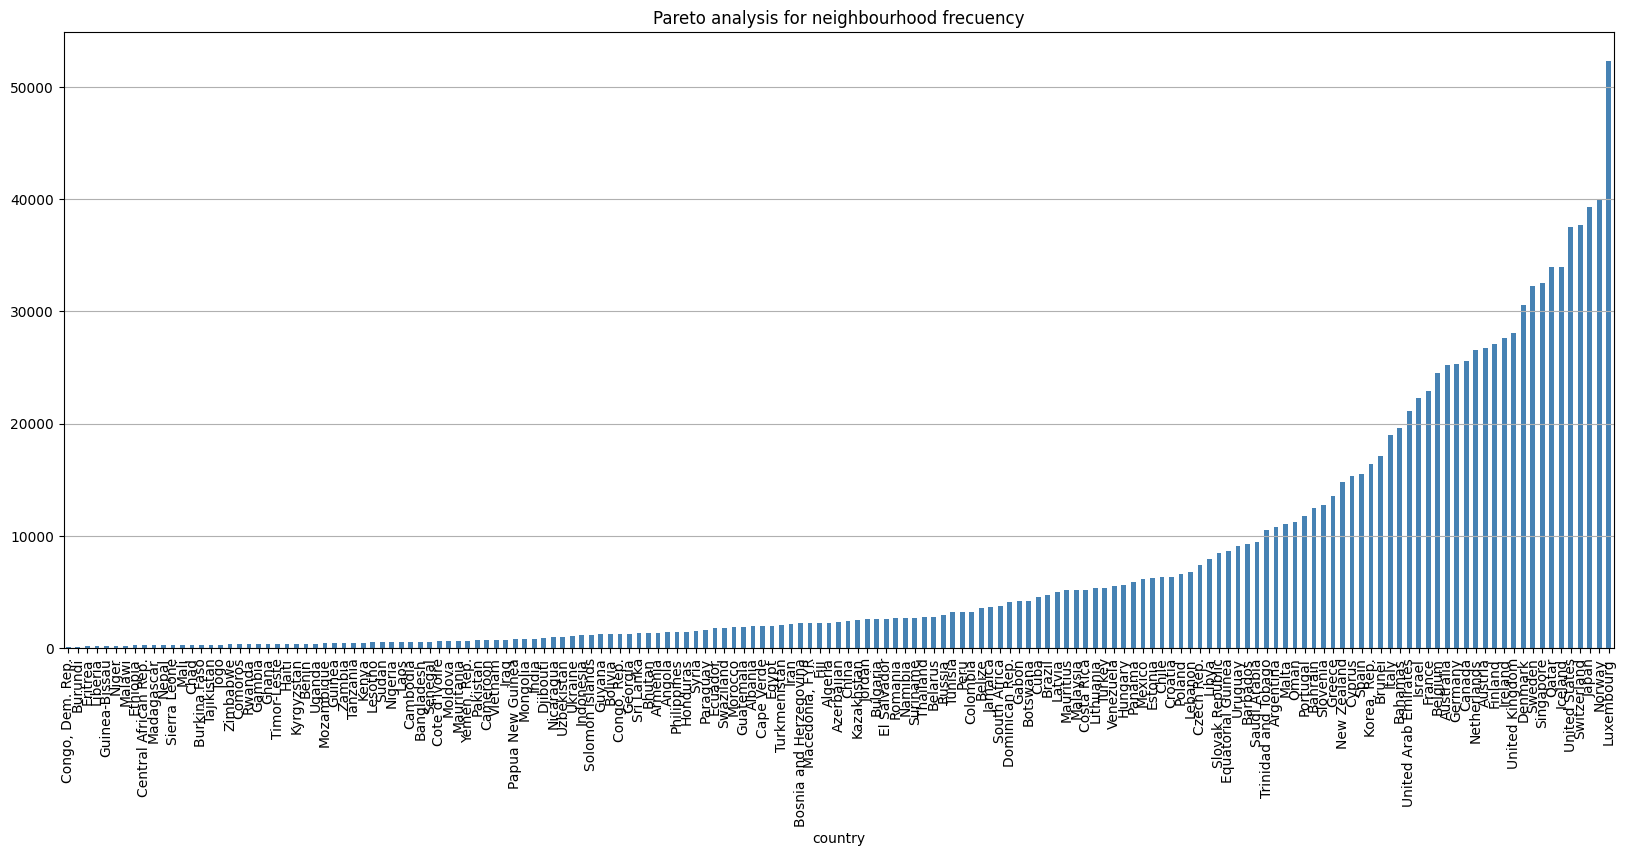

In [637]:
plt.figure(figsize=(20, 8))
Inc["incomeperperson"].sort_values().plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()

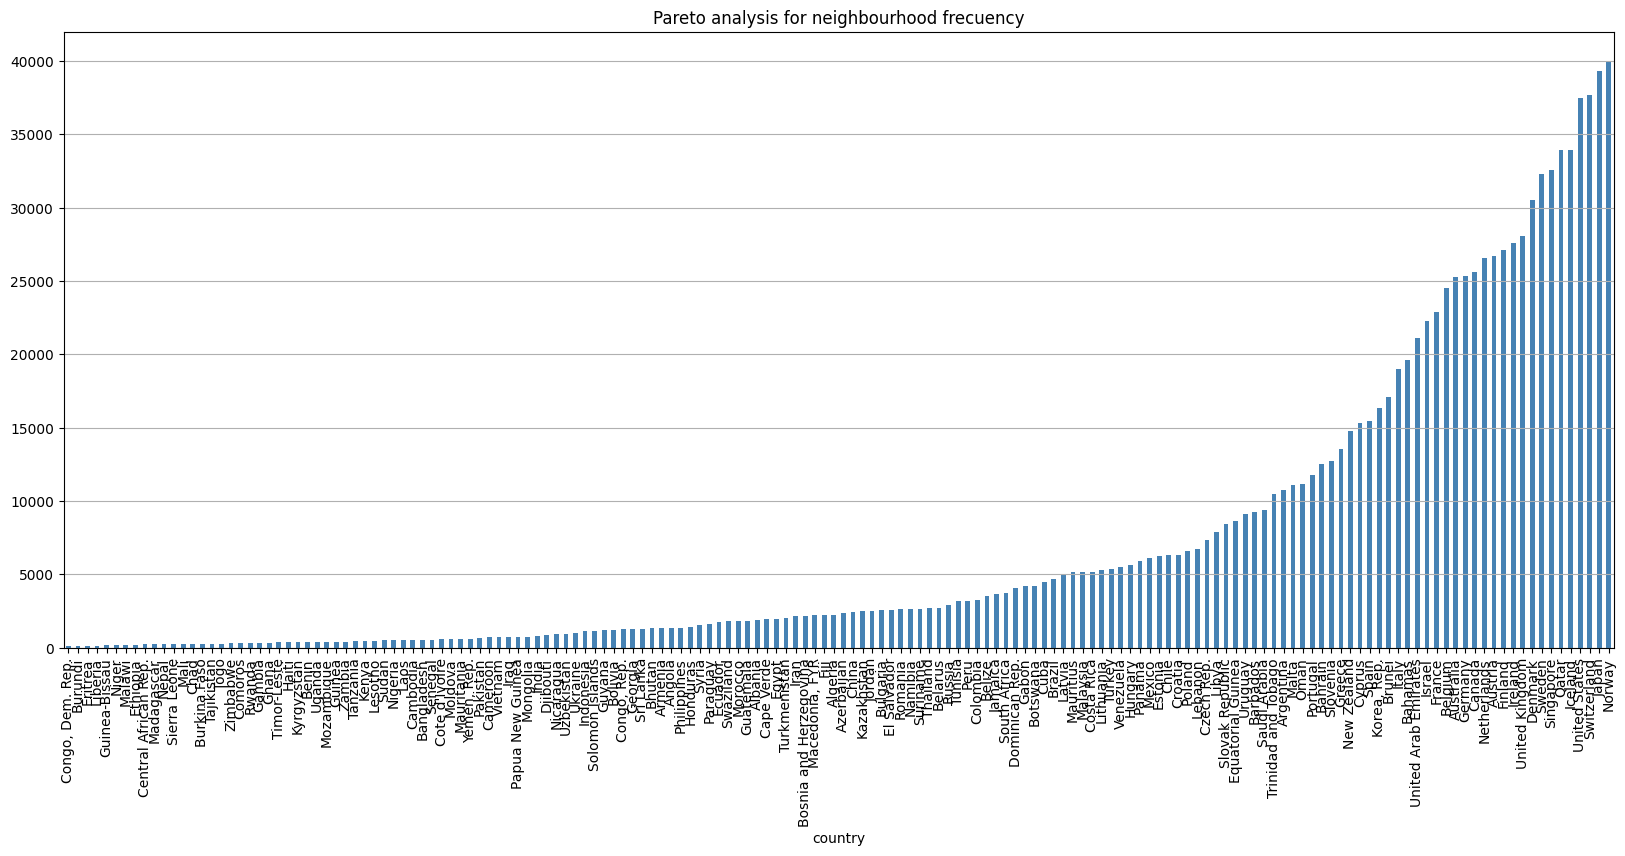

In [638]:
q1 = data["incomeperperson"].quantile(0.25)
q3 = data["incomeperperson"].quantile(0.75)
iqr = q3 - q1

plt.figure(figsize=(20, 8))
Inc.loc[Inc["incomeperperson"]<=(q3 + 4 *iqr)]["incomeperperson"].sort_values().plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()


In [639]:
data = data.drop(data[data["incomeperperson"]>=(q3+4*iqr)].index)

In [640]:
data.shape

(162, 16)

In [641]:
data["incomeperperson"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count      162.000000
mean      6923.626711
std       9878.036117
min        103.775857
5%         239.676689
25%        599.188702
50%       2288.445126
75%       8305.512026
95%      30407.337652
max      39972.352770
Name: incomeperperson, dtype: float64

Como se evidencio anteriormente, encotramos información importante en la base de datos con respecto a country e incomeperperson. Lo primero es que la variable incomeperperson tenia valores 'nan', los cuales fueron removidos, toda vez que la variable objetivo no puede contar con estos. Por otro lado, se evidencio la presencia de valores repetidos, lo cual no tiene logica alguna. Analizando en profundiad es evidente que se cuenta con información duplicada de algunos paises, lo cual puede ir en contrar de nuestro modelo de regresión, por ende tambien fueron removidos.

Una vez estos cambios fueron realizados, se evidencio que la variable incomeperperson, tiene un comportamiento bastante variado, sin embargo, existe un valor particularmente atipico, que corresponde al pais de Luxemburgo, registro que tampoco sera tomado en cuenta para nuestro analisis ya que esta mas de 4 veces por encima del rango intercuartil. 

#### 1.1.2 oilperperson

In [642]:
data["oilperperson"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    60.000000
mean      1.379010
std       1.747206
min       0.032281
5%        0.139792
25%       0.490364
50%       0.883796
75%       1.583022
95%       4.212058
max      12.228645
Name: oilperperson, dtype: float64

In [643]:
data["oilperperson"].isnull().sum() / data.shape[0]

0.6296296296296297

Como se evidencia anterioprmetne la variable oilperperson es altamente variable, dado que tiene valores puntualmente muy altos. De golpe se evidencia que esta no puede ser una feature ha utilizar, dado que cuenta con mas del 62% de valores nulos. A pesar de que representaba especial interes, dado el uso del petroleo que suele representa el comportamiento industrial, no puede ser utilizada en el presente analisis

#### 1.1.2 internetuserate y employrate

In [644]:
data["internetuserate"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    160.000000
mean      33.458152
std       27.733137
min        0.210066
5%         1.684989
25%        9.149516
50%       28.580958
75%       52.257732
95%       82.550682
max       95.638113
Name: internetuserate, dtype: float64

In [645]:
data["internetuserate"].isnull().sum() / data.shape[0]

0.012345679012345678

In [646]:
data["employrate"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    161.000000
mean      59.109317
std       10.387672
min       34.900002
5%        42.000000
25%       51.400002
50%       58.900002
75%       65.000000
95%       78.199997
max       83.199997
Name: employrate, dtype: float64

In [647]:
data["internetuserate"]

0      69.770394
1      44.989947
2       2.300027
3      70.028599
4      53.740217
         ...    
173    31.050013
174    28.731883
175     6.500823
176     5.098265
177    74.247572
Name: internetuserate, Length: 162, dtype: float64

In [648]:
data["employrate"].isnull().sum() / data.shape[0]

0.006172839506172839

Como se evidencia anteriormente estas dos variables no representan un comportamiento particualermente variado, tienen una desviación menor a su media y su representación en caurtiles, no muestra picos particularmente altos. Se resalta tambien que para internetuserate solo el 1% corresponde a valores nulos y para employrate solo el 0.6%. Estas son de espacial interes dado su que representan la capacidad de personal productivo e innovación digital de un pais

### 1.2 Analisis Biivariado

In [649]:
columns = [
    'oilperperson',
    'relectricperperson',
    'hivrate',
    'polityscore',
    'internetuserate',
    'armedforcesrate',
    'co2emissions',
    'femaleemployrate',
    'breastcancerper100th',
    'employrate',
    'urbanrate',
    'suicideper100th',
    'alcconsumption',
    'lifeexpectancy']

<Axes: >

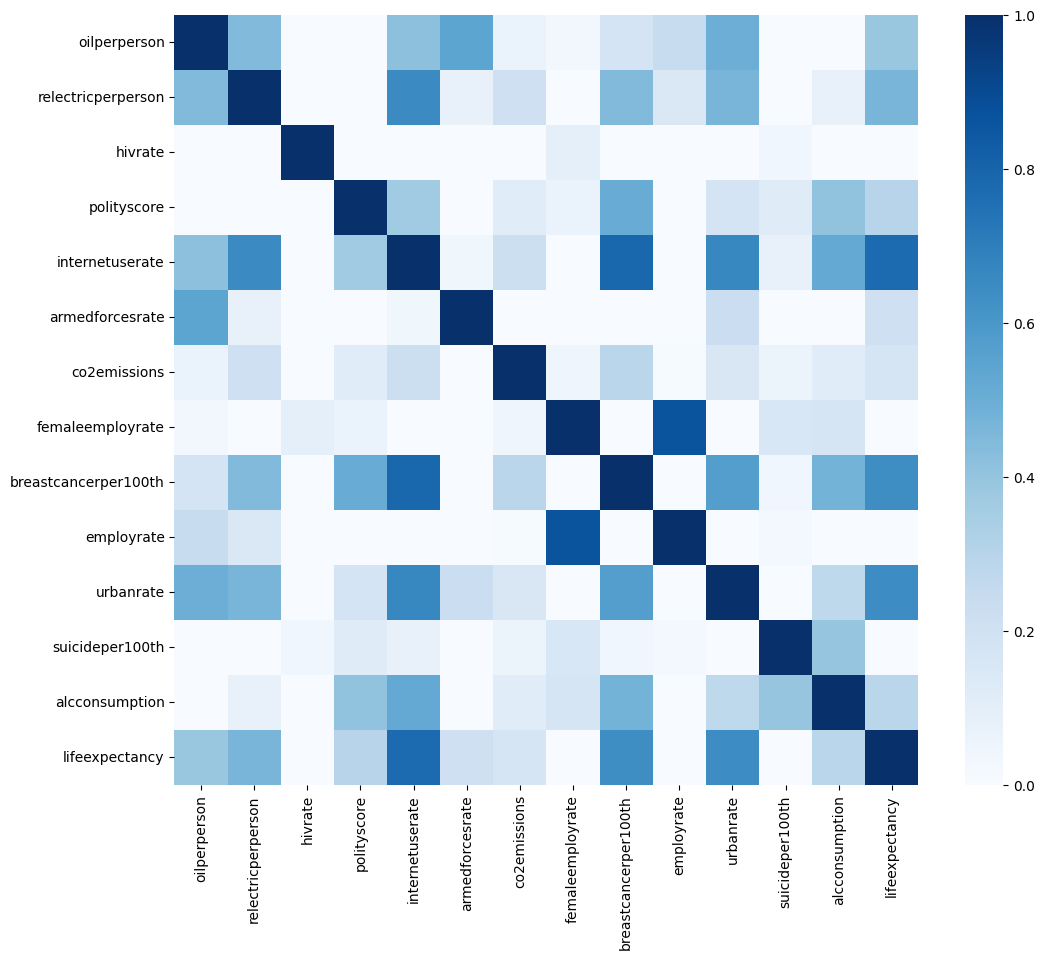

In [650]:
plt.figure(figsize=(12, 10))
sns.heatmap(data[columns].corr(), cmap="Blues", vmin=0, vmax=1)

In [651]:
data[columns].corr()

,oilperperson,relectricperperson,hivrate,polityscore,internetuserate,armedforcesrate,co2emissions,femaleemployrate,breastcancerper100th,employrate,urbanrate,suicideper100th,alcconsumption,lifeexpectancy
oilperperson,1.000000,0.447572,-0.074064,-0.210012,0.418779,0.542695,0.066635,0.032879,0.179405,0.245246,0.498886,-0.112649,-0.187963,0.389460
relectricperperson,0.447572,1.000000,-0.199598,0.001091,0.648779,0.075343,0.208870,0.000166,0.448570,0.144667,0.466060,-0.085619,0.078017,0.467807
hivrate,-0.074064,-0.199598,1.000000,-0.086681,-0.343434,-0.168821,-0.065990,0.093425,-0.274728,-0.009568,-0.276430,0.038339,-0.063364,-0.575209
polityscore,-0.210012,0.001091,-0.086681,1.000000,0.364595,-0.308008,0.113742,0.067378,0.510423,-0.132070,0.179049,0.122742,0.408940,0.298189
internetuserate,0.418779,0.648779,-0.343434,0.364595,1.000000,0.039603,0.221795,-0.105887,0.786112,-0.199487,0.666074,0.075813,0.521598,0.771469
armedforcesrate,0.542695,0.075343,-0.168821,-0.308008,0.039603,1.000000,-0.062121,-0.373178,-0.013523,-0.300415,0.223162,-0.096146,-0.198163,0.207776
co2emissions,0.066635,0.208870,-0.065990,0.113742,0.221795,-0.062121,1.000000,0.049091,0.289210,0.010358,0.155113,0.057223,0.116534,0.169310
femaleemployrate,0.032879,0.000166,0.093425,0.067378,-0.105887,-0.373178,0.049091,1.000000,-0.066340,0.861835,-0.327199,0.158555,0.172309,-0.292574
breastcancerper100th,0.179405,0.448570,-0.274728,0.510423,0.786112,-0.013523,0.289210,-0.066340,1.000000,-0.224741,0.574159,0.036870,0.479581,0.639302
employrate,0.245246,0.144667,-0.009568,-0.132070,-0.199487,-0.300415,0.010358,0.861835,-0.224741,1.000000,-0.330089,0.021635,-0.115464,-0.311509


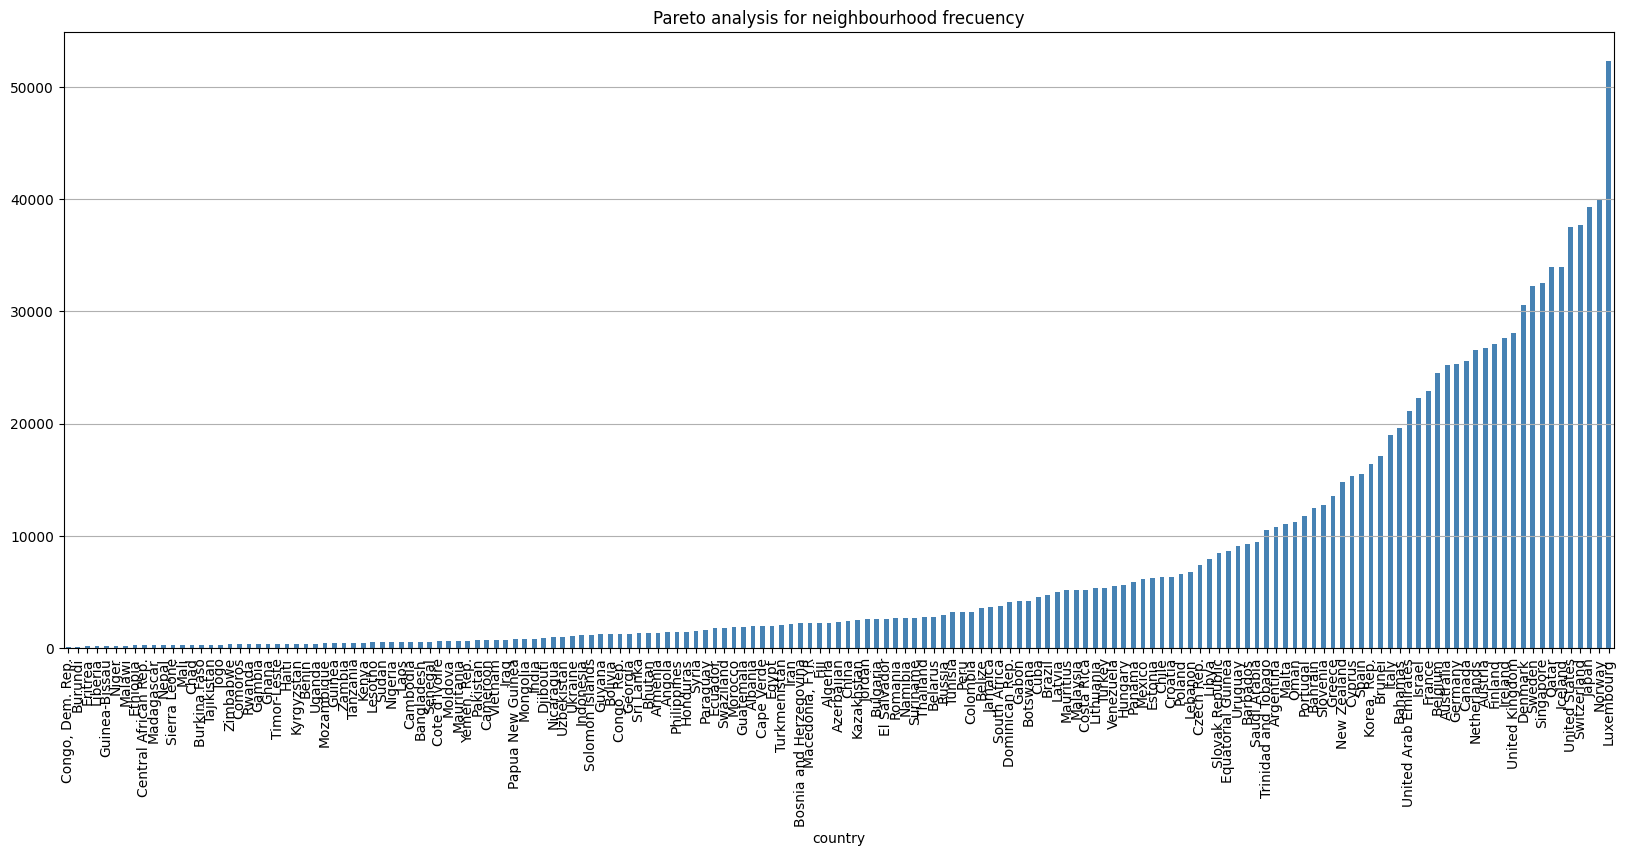

In [652]:
plt.figure(figsize=(20, 8))
Inc["incomeperperson"].sort_values().plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()

Como se denota en la matriz de correlación la gran mayoria de features no estan corelacionadas entre ellas, a excepción de femaleemployerate contra employrate, la cual presenta una corelación mayor de 0.86. Esto tiene sentido, dado que la tasa de empleabilidad de mujeres debe estar representada en la tasa de empleabilidad total. Es de notar, que como estas estan altamente corelacionadas, esta no sera utilizada en la selección de features para el modelo de regresión

## 2. LIMPIEZA DE DATOS, SELECCION DE FEATURES INICIAL Y EXPANSION DE ANALISIS BIVARIADO

en terminos de limmpieza de datos, se evidencio un patron de valores duplicados en los paises, que coincida con valores duplicados de registros, los caules fueron previsamente eliminados para llevar a cabo un mejor analisis, estas son acciones de limipieza. Por otro lado, se noto un dato de incomeperperson muy por encima del valor del rango intercuartil, mas de 4 vceces por encima el valor del valor intercuartil. Se tomo la decisión de prescindir de este dato

A continuación se revisaran los valores nulos de las prinicipales columnas, y se deicidira si es pertinente la eliminación de los mismos, o es mejor la no consideración dentro de los features del modelo

In [653]:
(data.isnull().sum() / data.shape[0]).sort_values(ascending=False)

oilperperson            0.629630
relectricperperson      0.216049
hivrate                 0.123457
polityscore             0.055556
armedforcesrate         0.024691
co2emissions            0.012346
internetuserate         0.012346
breastcancerper100th    0.006173
femaleemployrate        0.006173
employrate              0.006173
country                 0.000000
incomeperperson         0.000000
alcconsumption          0.000000
lifeexpectancy          0.000000
suicideper100th         0.000000
urbanrate               0.000000
dtype: float64

In [654]:
features_1 = [
    #'oilperperson',
    #'relectricperperson',
    #'hivrate',
    'polityscore',
    'internetuserate',
    'armedforcesrate',
    'co2emissions',
    #'femaleemployrate',
    #'breastcancerper100th',
    'employrate',
    'urbanrate',
    'suicideper100th',
    'alcconsumption',
    'lifeexpectancy']

In [655]:
data.drop_duplicates(subset=features_1+["incomeperperson"], inplace=True)

In [656]:
data = data.dropna(subset=["incomeperperson"]+features_1)

In [657]:
data.shape

(144, 16)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


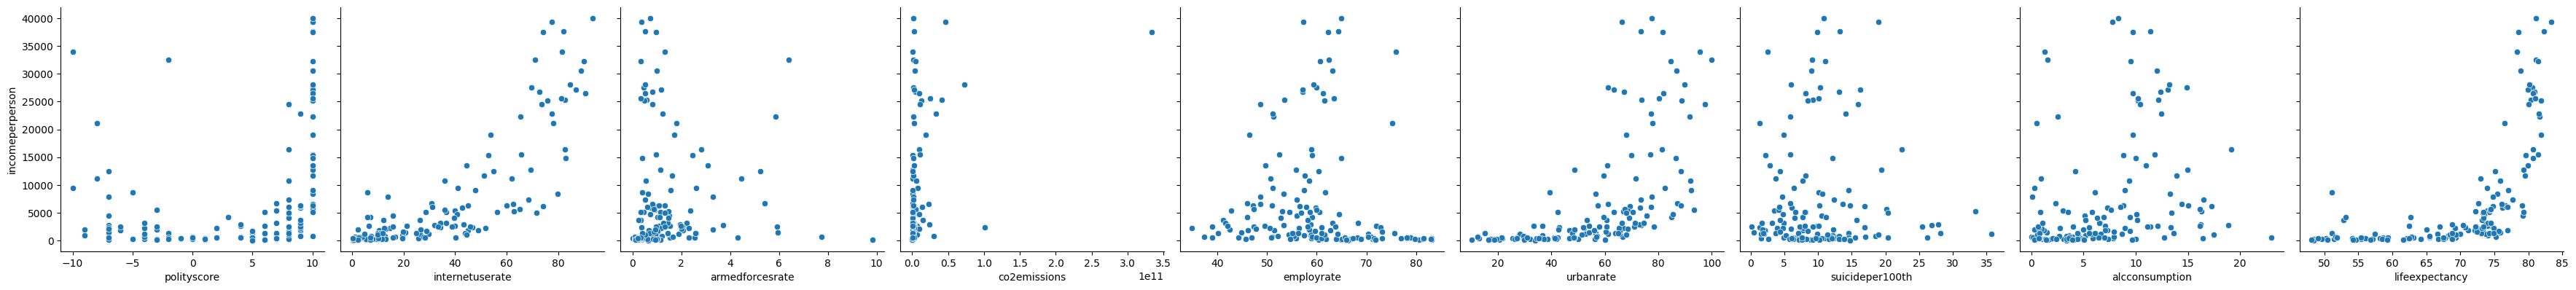

In [658]:
sns.pairplot(data, height=4, y_vars="incomeperperson", x_vars=features_1, kind="scatter")

<Axes: >

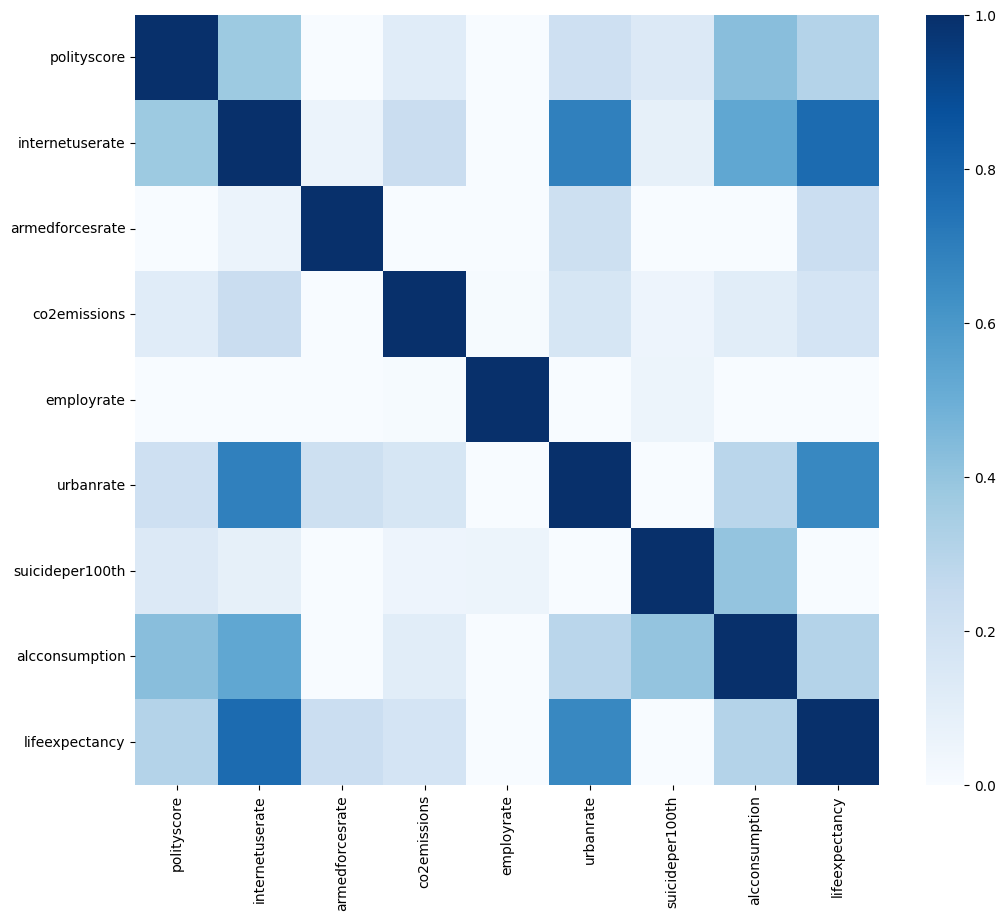

In [659]:
plt.figure(figsize=(12, 10))
sns.heatmap(data[features_1].corr(), cmap="Blues", vmin=0, vmax=1)

como se menciono anteriormente, se reviso la información de valores nulos, y se hayo que las variables oilperperson, relectricperperson y hivrate presentand muchos valores nulos, de modo que no deben seran utilizados de ahora en adelante en el modelo y no hacen parte de las features seleccionadas inicialmente. Asimismo, no se escoge la variable femaleemployrate dado su colinealidad con employrate. Finalmente, la variable de cancer de pecho tampoco es escogida, esta es removida dado que no tiene un enfoque de interpretablidad en este modelo. Conforme esto, las demas variables fueron escogidas como features iniciales para el modelo inicial. 

Considerando estas, se procedio a eliminar los valores nulos en estas mismas, generando un database final de 143 registros. 

Se evidencia de igual forma las graficas de posición de puntos entre la variable objetivo y cada feature escopgida y se evidencia que existe comportamietno lineal entre estas, sin embargo, es de rescatar la varaible internetuserate que presenta un comportamiento medianamente lineal.

## 3. ENTRENAMIENTO Y SELECCION DEL MODELO

### 3.1 Particionamiento del database

Se escoge utilizar el 30% de la base en testeo, el resto en entrenamiento

In [660]:
X_train, X_test, y_train, y_test = train_test_split(data[features_1], data["incomeperperson"], test_size=0.3, random_state=1)

In [661]:
X_train.shape, y_train.shape

((100, 9), (100,))

In [662]:
X_test.shape, y_test.shape

((44, 9), (44,))

### 3.2 Entrenamiento de un modelo inicial

In [663]:
regression = LinearRegression()

In [664]:
regression.fit(X_train, y_train)

LinearRegression()

In [665]:
pd.DataFrame({"columns": features_1, "coef": regression.coef_})

,columns,coef
0,polityscore,1.155563e+02
1,internetuserate,2.575586e+02
2,armedforcesrate,-2.174522e+01
3,co2emissions,6.432396e-08
4,employrate,1.468461e+02
5,urbanrate,4.282893e+01
6,suicideper100th,-5.909865e+01
7,alcconsumption,-2.562423e+02
8,lifeexpectancy,-1.931409e+01


In [666]:
regression.intercept_

-10463.113755065426

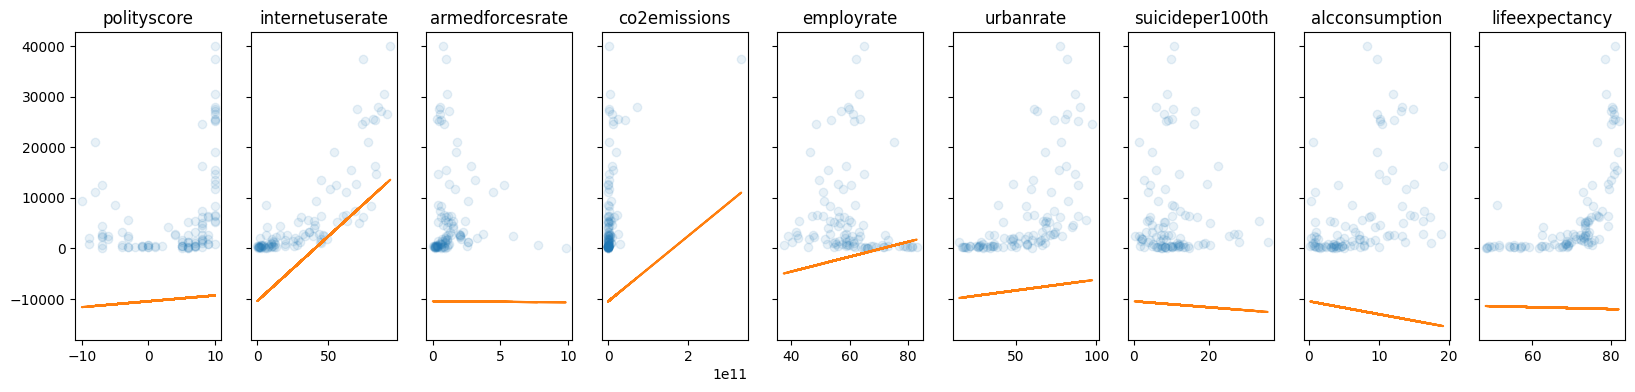

In [667]:
f, axs = plt.subplots(1, len(features_1), sharey=True, figsize=(20, 4))

for i in range(len(features_1)):
    col = features_1[i]
    x = X_train[col]
    m = regression.coef_[i]
    b = regression.intercept_

    axs[i].plot(x, y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

In [668]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, regression.predict(X_train)))
print("Test:", mean_absolute_error(y_test, regression.predict(X_test)))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, regression.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, regression.predict(X_test))))

MAE:
Train: 3307.2293016742647
Test: 4458.166918494805

RMSE:
Train: 4530.6688601496235
Test: 6353.512502782958


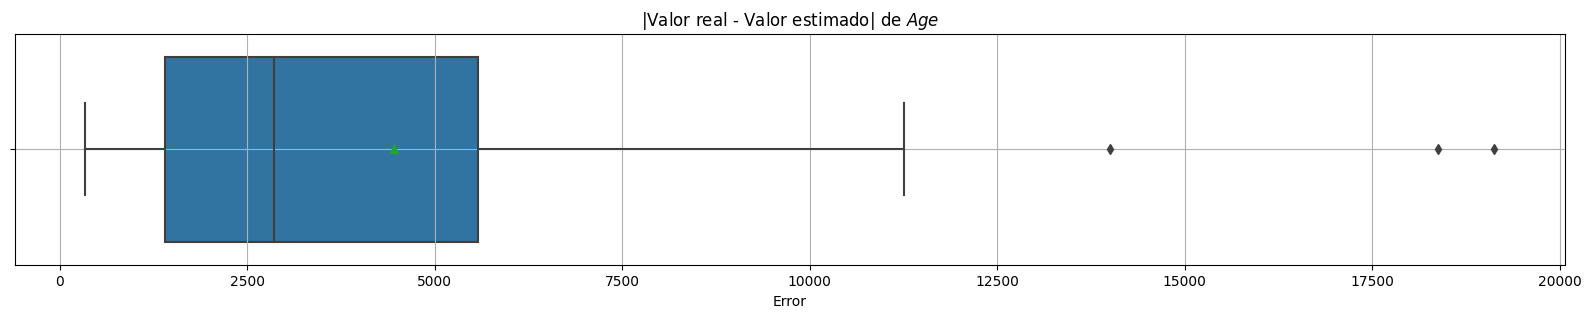

In [669]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=abs(y_test - regression.predict(X_test)), showmeans=True, orient="h")
plt.title("|Valor real - Valor estimado| de $\t{Age}$")
plt.xlabel("Error")
plt.grid()
plt.show()

In [670]:
y_test.describe(percentiles=[0.25, 0.5, 0.75, 0.99])

count       44.000000
mean      8043.135489
std      11645.629143
min        115.305996
25%        610.050827
50%       2328.732314
75%       8190.682836
99%      38601.385988
max      39309.478860
Name: incomeperperson, dtype: float64

In [671]:
abs(y_test-regression.predict(X_test)).describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count       44.000000
mean      4458.166918
std       4579.129168
min        337.740816
25%       1393.984707
50%       2849.366103
75%       5580.856785
90%      10976.227771
95%      13590.703121
99%      18802.975227
max      19128.588266
Name: incomeperperson, dtype: float64

Se evidencia que el modelo tiene errores en el 75% de los escenarios menores a la desviación estandar de los datos de entrenamiento, por demas el valor del cuartil 3 (75%) es menor a la mitad de la desviacion estandar de los datos de entrenamiento. Esto puede indicar que este modelo pueda ser funcional, teniendo claro que las medidas MAE y RMSE se parecen entre valores de entranmiento y testeo. Es de notar que el intercepto da un valor negativo, algo que no tendria sentido, consdierando que este modelo debe ser un predictoo del ingreso bruto por persona, se procede a entrenar un modelo normalizado

### 3.3 Entrenamiento de un modelo con variables normalizadas

In [672]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [673]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [674]:
pd.DataFrame({"columns": features_1, "coef": pipeline["model"].coef_})

,columns,coef
0,polityscore,716.332656
1,internetuserate,7300.274325
2,armedforcesrate,-32.792043
3,co2emissions,2202.102563
4,employrate,1455.285434
5,urbanrate,929.838374
6,suicideper100th,-401.416307
7,alcconsumption,-1302.859454
8,lifeexpectancy,-182.146699


In [675]:
pipeline["model"].intercept_

6491.149693662001

In [676]:
y_train.mean(), y_test.mean()

(6491.149693662001, 8043.13548919091)

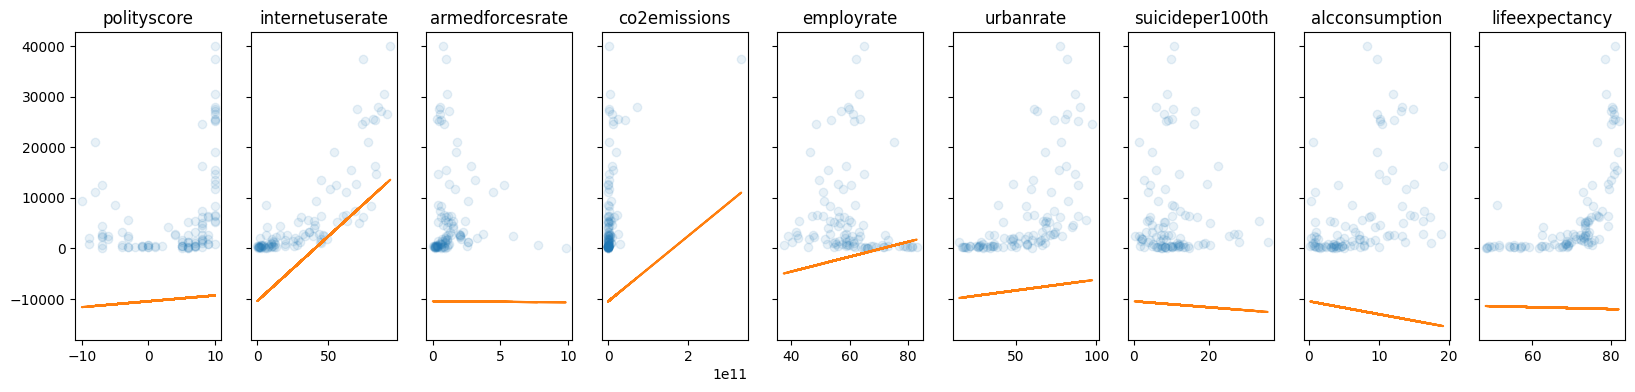

In [677]:
f, axs = plt.subplots(1, len(features_1), sharey=True, figsize=(20, 4))

for i in range(len(features_1)):
    col = features_1[i]
    x = X_train[col]
    m = regression.coef_[i]
    b = regression.intercept_

    axs[i].plot(x, y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

In [678]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train)))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test)))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test))))

MAE:
Train: 3307.229300620093
Test: 4458.166942134714

RMSE:
Train: 4530.668860149616
Test: 6353.512458945675


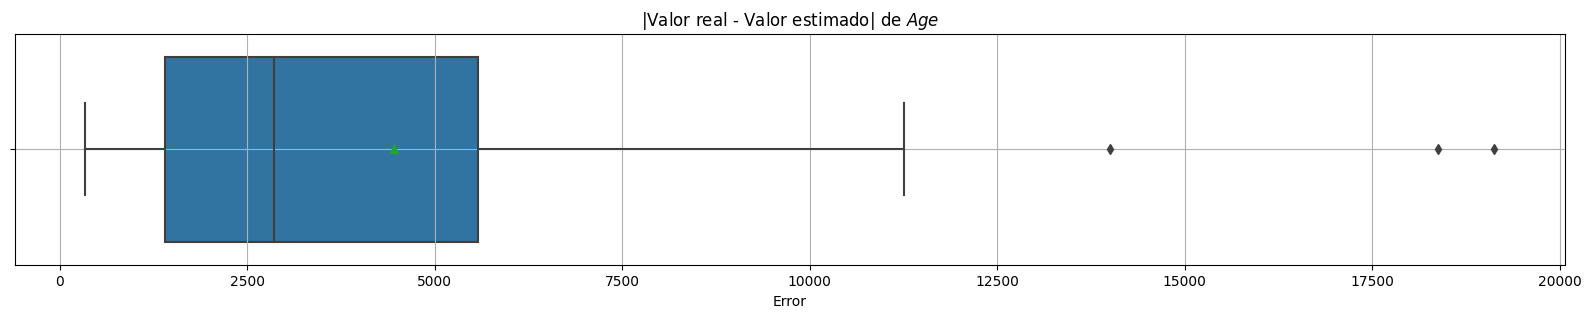

In [679]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=abs(y_test - pipeline.predict(X_test)), showmeans=True, orient="h")
plt.title("|Valor real - Valor estimado| de $\t{Age}$")
plt.xlabel("Error")
plt.grid()
plt.show()

In [680]:
y_test.describe(percentiles=[0.25, 0.5, 0.75, 0.99])

count       44.000000
mean      8043.135489
std      11645.629143
min        115.305996
25%        610.050827
50%       2328.732314
75%       8190.682836
99%      38601.385988
max      39309.478860
Name: incomeperperson, dtype: float64

In [681]:
abs(y_test-pipeline.predict(X_test)).describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count       44.000000
mean      4458.166942
std       4579.129082
min        337.740979
25%       1393.984621
50%       2849.366277
75%       5580.856885
90%      10976.227553
95%      13590.703119
99%      18802.975083
max      19128.588259
Name: incomeperperson, dtype: float64

A diferencia del modelo anterior, el intercepto de este es positivo, denotando algo mucho mas logico como resultado del modelo. Por otro lado, los errres sigue teniendo un comportamiento similar entre testeo y entrenamiento, teniendo claro que ahora la relación entre errores al 75% y la desviación estandar es aun menor. Se considera este una mejor opción, sin embargo, se procede a generar una regresión Lasso, para seleccionar nuevos features

### 3.4 Entrenamiento de un modelo Lasso

In [682]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", Lasso(alpha=0.1))
    ]
)

In [683]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', Lasso(alpha=0.1))])

In [684]:
pd.DataFrame({"columns": features_1, "coef": pipeline["model"].coef_})

,columns,coef
0,polityscore,716.148838
1,internetuserate,7299.795814
2,armedforcesrate,-32.788967
3,co2emissions,2202.065230
4,employrate,1455.206852
5,urbanrate,929.597904
6,suicideper100th,-401.382561
7,alcconsumption,-1302.529845
8,lifeexpectancy,-181.624966


### 3.5 Nuevo modelo de entrenamiento normalizado, nueva selección de features

Como resultado de la regresión lasso, se remueven las variables armedforcesrate, femaleemployrate, breastcancerper100th y lifeexpectancy

In [685]:
features_2 = [
    #'oilperperson',
    #'relectricperperson',
    #'hivrate',
    'polityscore',
    'internetuserate',
    ##'armedforcesrate',
    'co2emissions',
    #'femaleemployrate',
    #'breastcancerper100th',
    'employrate',
    'urbanrate',
    ##'suicideper100th',
    'alcconsumption',
    ##'lifeexpectancy'
    ]

In [686]:
regression = LinearRegression()

In [687]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [688]:
X_test = X_test[features_2]
X_train = X_train[features_2]

In [689]:
pipeline.fit(X_train[features_2], y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [690]:
pd.DataFrame({"columns": features_2, "coef": pipeline["model"].coef_})

,columns,coef
0,polityscore,708.320664
1,internetuserate,7190.652597
2,co2emissions,2199.239655
3,employrate,1523.474316
4,urbanrate,1034.139129
5,alcconsumption,-1492.485371


In [691]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train)))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test)))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test))))

MAE:
Train: 3324.73990974369
Test: 4387.1973552271675

RMSE:
Train: 4545.341062475822
Test: 6264.220602276936


In [692]:
y_test.describe(percentiles=[0.25, 0.5, 0.75, 0.99])

count       44.000000
mean      8043.135489
std      11645.629143
min        115.305996
25%        610.050827
50%       2328.732314
75%       8190.682836
99%      38601.385988
max      39309.478860
Name: incomeperperson, dtype: float64

In [693]:
abs(y_test-pipeline.predict(X_test)).describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

count       44.000000
mean      4387.197355
std       4523.042301
min        161.414345
25%       1250.475848
50%       2916.820765
75%       5427.027137
95%      13092.440312
99%      18389.528730
max      18534.016404
Name: incomeperperson, dtype: float64

Este nuevo modelo, posterior a la reselección de features se considera él mejor predictor generado hasta el momdento, dado que tiene pocos features con coeficientes altos, y errores similares entre entrenamiento y testo, asi como un intercepto positivo. Este sera el modelo final

### 3.6 Validación de supuestos

#### 3.6.1 Colinealidad

<Axes: >

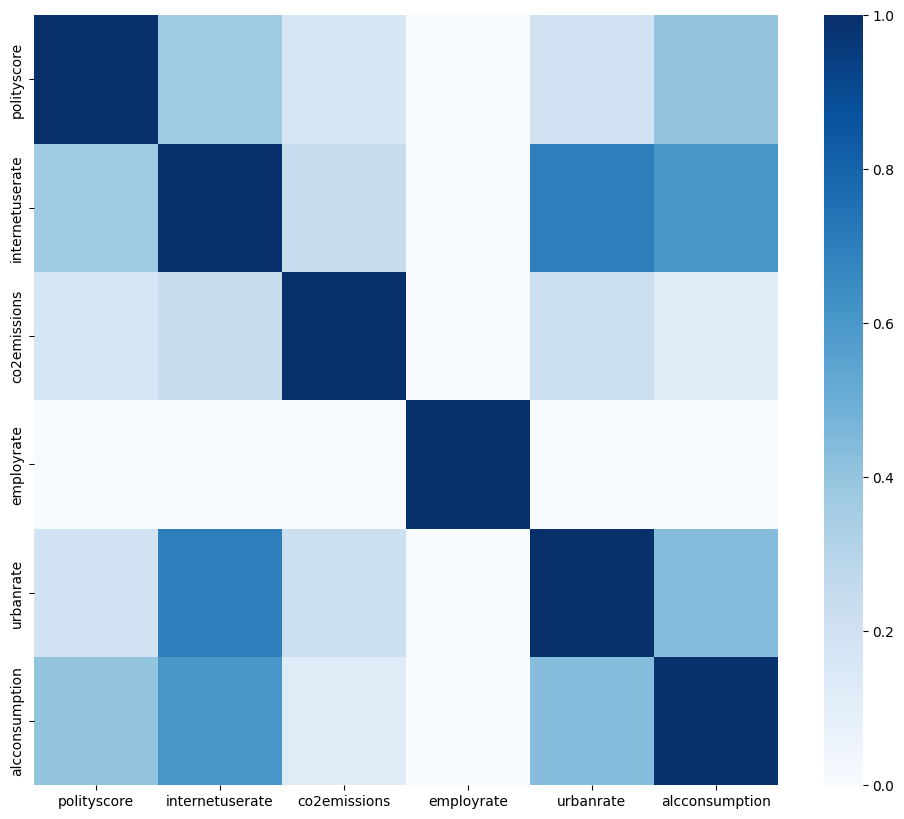

In [694]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), cmap="Blues", vmin=0, vmax=1)

In [695]:
X_train.corr()

,polityscore,internetuserate,co2emissions,employrate,urbanrate,alcconsumption
polityscore,1.000000,0.369404,0.165488,-0.107728,0.192288,0.404606
internetuserate,0.369404,1.000000,0.243670,-0.279800,0.701773,0.605358
co2emissions,0.165488,0.243670,1.000000,-0.009044,0.212097,0.120014
employrate,-0.107728,-0.279800,-0.009044,1.000000,-0.425890,-0.162693
urbanrate,0.192288,0.701773,0.212097,-0.425890,1.000000,0.430186
alcconsumption,0.404606,0.605358,0.120014,-0.162693,0.430186,1.000000


Dado que ningun valor en la matriz de corelacion es mayor a 0.8, se puede confirmar que las variables escogidas no representan un riesgo de colinealidad, es decir, no tiene una relación lineal entre ellas

#### 3.6.2 Linealidad

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


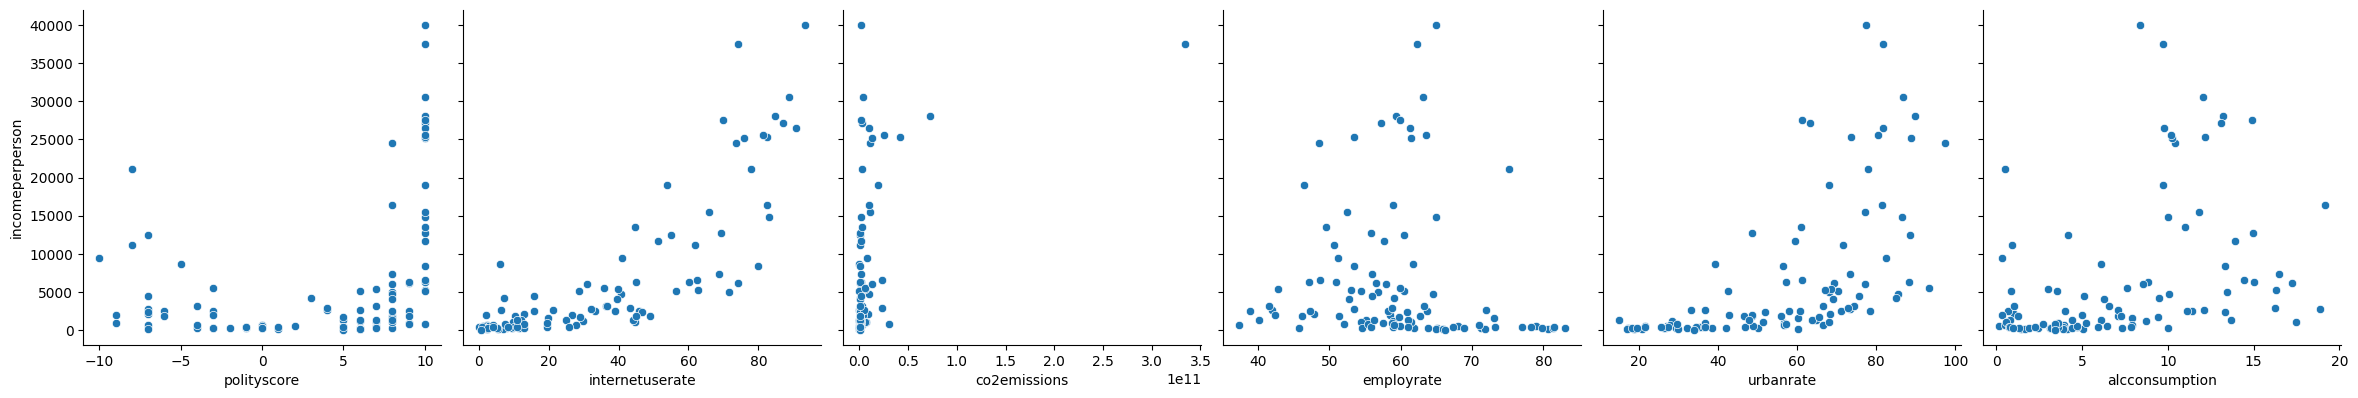

In [696]:
sns.pairplot(pd.concat([X_train, y_train], axis=1), height=4, y_vars="incomeperperson", x_vars=features_2, kind="scatter")

In [697]:
pipeline2 = Pipeline(
    [
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [698]:
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [699]:
pd.DataFrame({"columns": pipeline2["poly"].get_feature_names_out(), "coef": pipeline2["model"].coef_})

,columns,coef
0,polityscore,2314.696765
1,internetuserate,-11299.602283
2,co2emissions,28123.404561
3,employrate,-1119.419165
4,urbanrate,4498.940240
5,alcconsumption,-2007.572754
6,polityscore^2,1215.891216
7,polityscore internetuserate,2522.118699
8,polityscore co2emissions,5523.396732
9,polityscore employrate,-938.581012


In [700]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline2.predict(X_train)))
print("Test:", mean_absolute_error(y_test, pipeline2.predict(X_test)))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline2.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline2.predict(X_test))))

MAE:
Train: 2026.0104908907922
Test: 5035.275840540964

RMSE:
Train: 3116.033350741594
Test: 10922.674519738406


Como se evidencia en las graficas generadas, las variables no siguen una distribución lineal clara con respecto a la variable objetivo, de modo que se entreno un modelo polinomial que permita ver si relaciónes no lineales generan mejor respuesta en el predictor, sin embargo, el error se triplico, de modo que un enfoque lineal esta funcionando mejor

#### 3.6.3 Normalidad de los errores

In [701]:
errors = (pipeline.predict(X_train)-y_train).values

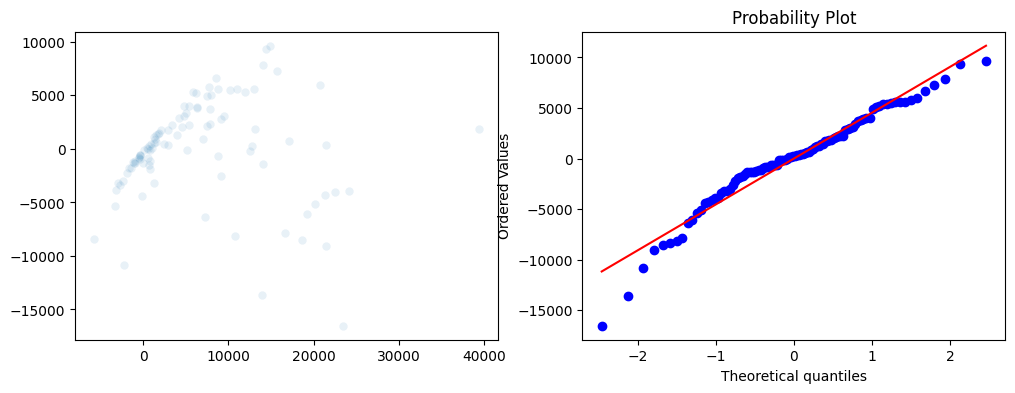

In [702]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersión
sns.scatterplot(x=pipeline.predict(X_train), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

Como se evidencia anteriormente, los errores estan siguiendo una distribución mayoritariamente normal, algo que permite considerar el modelo como valido

#### 3.6.4 Normalidad de los errores

<Axes: >

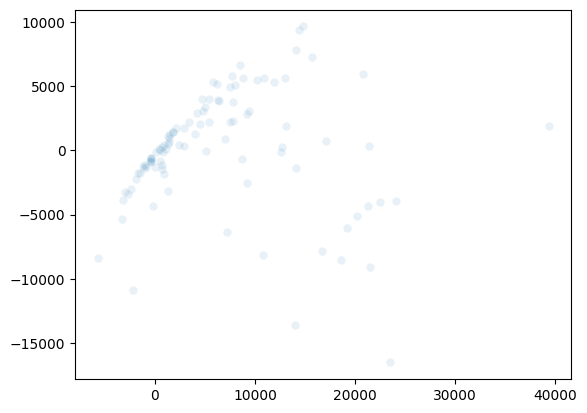

In [703]:
sns.scatterplot(x = pipeline.predict(X_train), y=errors, alpha=0.1)

Se evidencia un comportaiento regular de los errores en el modelo, puede gestionarse con acciones entre variables en un modelo polinomial

## 4. INSIGHTS DE POLITICA PUBLICA

Como resultado de nuestro modelo se obtiene un coeficiente perfectamente interpretable para cada variable seleccionada, como se evidencia a continuación:

In [704]:
pd.DataFrame({"columns": features_2, "coef": pipeline["model"].coef_})

,columns,coef
0,polityscore,708.320664
1,internetuserate,7190.652597
2,co2emissions,2199.239655
3,employrate,1523.474316
4,urbanrate,1034.139129
5,alcconsumption,-1492.485371


Estos coeficientes presentan información valiosa y permiten generar insights valiosos para cualquier gobierno que busque crecer su PIB. Es de notar que el modelo final es normalizado, de modo que los coeficientes son perfectamente comparables entre ellos


### Uso de internet

- Variable:       internetuserate

- Coeficiente:    7190.652597

El coeficiente positivo mas grande del modelo lo presenta la variable "internetuserate", que representa mas del triple que el siguiente coeficiente mas grande. Esto demuestra que seria efectivo para un gobierno aumentar el consumo de internet, dado que este es un indicador claro de avance en tecnologías y emprendimientos digitales. Los cuales corresponden a la mayor parte de nuevas iniciativas start up. La digitalización y el uso de internet, promete ser una oportunidad en un mercado emergente que crece cada día


### Emisiones de CO2

- Variable:       co2emissions

- Coeficiente:    2199.239655

Dado que esta variable considera las emisiones totales producto de un pais, esta abarca mas que la emision por persona, es decir, contempla toda la producción industrial y de servicios. Esto denota que a mayor industrialización y producción mayor sera el PIB, es decir, el estado debe propender por mejorar su capacidad de producción y aumentar como sea posible su capacidad de servicios

### Tasa de empleo

- Variable:       employrate

- Coeficiente:    1523.474316

El modelo nos deja en evidencia que a mayor tasa de empleo mayor PIB. Esto tiene todo el sentido, considerando que entre mas población productiva (con trabajo activo claro) mayor sera la productividad general de un pais. Cualquier aumento en la productividad, denota un aumento claro en el PIB. Es deber de un estado, gestionar propuestas razonables e innovativas en materia de empleo, de modo que se pueda ofrecer la mayor cantidad de empleos a las personas. Esto conlleva una clara necesidad de educación y capacitación, asi como negociaciones bien llevadas con el sector empresarial del pais respectivo

### Urbanización

- Variable:       urbanrate

- Coeficiente:    1034.139129

La urbanización de las diferentes zonas permite mayor gestion economica, asi como mejores condiciones de vida para las personas. Es deber del estado, propender por mantener y generar espacios bien urbanizados para su pueblo. Esto permitira un mejor intercambio comercial (vias), mayores oportunidades de digitalización (internet y electricidad), mejor salud, por ende mas y mejores empleados (agua y salud). etc

### Democratización

- Variable:       polityscore

- Coeficiente:    708.320664

Un gobierno que respeta procesos judiciales, administrativos y legislativos; y que propende por una sociedad con garantia de derechos y deberes, es un escenario ideal para la inversión tanto nacional como extranjera, medida que a su vez genera flujo de dinero y de empleo en una nación. Es responsibliad y deber del estado, respetar y garantizar sus propios estatutos

### Consumo de Alcohol

- Variable:       alcconsumption

- Coeficiente:    -1492.485371

El unico coeficiente negativo del modelo, denota que el estado debe desincentivar el consumo de alcohol, mejorando asi la productividad y salud de los habitantes

En definitiva, lo expuesto anteriormente denota que un pais puede aumentar su PIB a traves del aumento en su productividad, esto por medio de la digitalización del negocio, mejores condiciones de vida, mejores tasas de empleo, mayor empresa e industria y una reducción al consumo de alcohol, algo que garantiza una mejor salud de los pobladores.

Este enfoque esta respaldado, como se evidencia en la sigueinte bibliografia


VARIABLES MACROECONÓMICAS Y MICROECONÓMICAS QUE INFLUYEN EN LA ESTIMACIÓN DEL COSTO DE CAPITAL: UN ESTUDIO DE CASO **
    http://www.scielo.org.co/scielo.php?script=sci_arttext&pid=S0121-68052017000100008


Uso de variables de actividad económica en la estimación del PIB per cápita microterritorial
    http://www.scielo.org.co/scielo.php?script=sci_arttext&pid=S0121-47722015000200007


The Factors Affecting Gross Domestic Product (GDP) in Developing Countries: The Case of Tanzania
    https://core.ac.uk/download/pdf/234624594.pdf